In [28]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from astropy.io import fits
import fitsio as ft
import pickle as pkl

# ==== Scikit-learn =======================
# Preprocessing
from sklearn.preprocessing import StandardScaler #Standar scaler for standardization
from sklearn.preprocessing import RobustScaler #Robust scaler for high dispersion
from sklearn.model_selection import train_test_split # For random split

# Classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

#Plotting
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# ==========================================
# Matplotlib, urlib etc 
import urllib
import urllib.request
import joblib
from joblib import dump, load
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from PIL import Image
from scipy.stats import kstest
%matplotlib inline

In [29]:
rfc_fin = joblib.load('/data/des81.a/data/kherron/LSBG/Y6_FINAL/v3/classifier.pkl') #1st stage
scaler_fin = joblib.load('/data/des81.a/data/kherron/LSBG/Y6_FINAL/v3/scaler.pkl') #1st stage

In [91]:
#sims = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/sim/run/r2/result/final/simulation_skim_r2.fits')
m = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/sim/run/r3/result/batch2/simulation_matched_r3.fits')
sims = ft.read("/data/des80.b/data/burcinmp/y6_lsbg/sim/run/r3/result/batch2/simulation_skim_r3.fits")

In [92]:
m.dtype.names

('id',
 'ra_in',
 'dec_in',
 'mag_in',
 'Aband',
 'reff_in',
 'sersic_n_in',
 'ell_in',
 'pa_in',
 'ra_se',
 'dec_se',
 'mag_se',
 'magerr_se',
 'flux_rad_se',
 'kron_rad_se',
 'mumax0_se',
 'mueff_se',
 'mumax_se',
 'mumean_se',
 'a_image',
 'b_image',
 'spread_model',
 'spreaderr_model',
 'class_star',
 'sersic_n',
 'sersic_n_err',
 'ell_g',
 'ell_err_g',
 'pa_g',
 'pa_err_g',
 'mag_g',
 'magerr_g',
 'reff_g',
 'reff_err_g',
 'mumean_g',
 'mu0_g')

In [53]:
mat = sims
coadd_ids_in = mat['COADD_OBJECT_ID']
ras_in = mat['RA']
decs_in = mat['DEC']
A_IMAGE_in = mat['A_IMAGE']
B_IMAGE_in = mat['B_IMAGE']

MAG_AUTO_G_in = mat['MAG_AUTO_G']-mat['A_G']
FLUX_RADIUS_G_in = 0.263*mat['FLUX_RADIUS_G']
MU_EFF_MODEL_G_in = mat['MU_EFF_MODEL_G']-mat['A_G']
MU_MAX_MODEL_G_in = mat['MU_MAX_MODEL_G']-mat['A_G']
MU_MEAN_MODEL_G_in = mat['MU_MEAN_MODEL_G']-mat['A_G']

MAG_AUTO_R_in = mat['MAG_AUTO_R']-mat['A_R']
FLUX_RADIUS_R_in = 0.263*mat['FLUX_RADIUS_R']
MU_EFF_MODEL_R_in = mat['MU_EFF_MODEL_R']-mat['A_R']
MU_MAX_MODEL_R_in = mat['MU_MAX_MODEL_R']-mat['A_R']
MU_MEAN_MODEL_R_in = mat['MU_MEAN_MODEL_R']-mat['A_R']

MAG_AUTO_I_in = mat['MAG_AUTO_I']-mat['A_I']
FLUX_RADIUS_I_in = 0.263*mat['FLUX_RADIUS_I']
MU_EFF_MODEL_I_in = mat['MU_EFF_MODEL_I']-mat['A_I']
MU_MAX_MODEL_I_in = mat['MU_MAX_MODEL_I']-mat['A_I']
MU_MEAN_MODEL_I_in = mat['MU_MEAN_MODEL_I']-mat['A_I']

# Ellipticity
Ell_in = 1. - B_IMAGE_in/A_IMAGE_in

# Colors
col_g_r_in = MAG_AUTO_G_in - MAG_AUTO_R_in
col_g_i_in = MAG_AUTO_G_in - MAG_AUTO_I_in
col_r_i_in = MAG_AUTO_R_in - MAG_AUTO_I_in

# Length of matrix
len_n = len(ras_in)

# Initialize
X_mat_in = np.zeros([len_n,19])

# Populate
# Ellipticity 
X_mat_in[:,0] = Ell_in
# Colors
X_mat_in[:,1] = col_g_i_in
X_mat_in[:,2] = col_g_r_in;
X_mat_in[:,3] = col_r_i_in
# Magnitudes
X_mat_in[:,4] = MAG_AUTO_G_in
X_mat_in[:,5] = MAG_AUTO_R_in
X_mat_in[:,6] = MAG_AUTO_I_in
# Flux radii
X_mat_in[:,7] = FLUX_RADIUS_G_in
X_mat_in[:,8] = FLUX_RADIUS_R_in
X_mat_in[:,9] = FLUX_RADIUS_I_in
# Peak (max) surface brightness
X_mat_in[:,10] = MU_MAX_MODEL_G_in
X_mat_in[:,11] = MU_MAX_MODEL_R_in
X_mat_in[:,12] = MU_MAX_MODEL_I_in
# Effective surface brightness
X_mat_in[:,13] = MU_EFF_MODEL_G_in
X_mat_in[:,14] = MU_EFF_MODEL_R_in
X_mat_in[:,15] = MU_EFF_MODEL_I_in
# Mean surface brightness 
X_mat_in[:,16] = MU_MEAN_MODEL_G_in
X_mat_in[:,17] = MU_MEAN_MODEL_R_in
X_mat_in[:,18] = MU_MEAN_MODEL_I_in



In [54]:
X_sims = scaler_fin.transform(X_mat_in)

In [55]:
y_pred = rfc_fin.predict(X_sims)

In [56]:
np.histogram(y_pred)

(array([627,   0,   0,   0,   0,   0,   0,   0,   0,  78]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [57]:
len(y_pred[y_pred==1])/len(y_pred)

0.11063829787234042

In [58]:
len(y_pred[y_pred==0])/len(y_pred)

0.8893617021276595

In [59]:
pp_ind = y_pred == 1
pn_ind = y_pred == 0

In [63]:
len(X_mat_)

(705, 19)

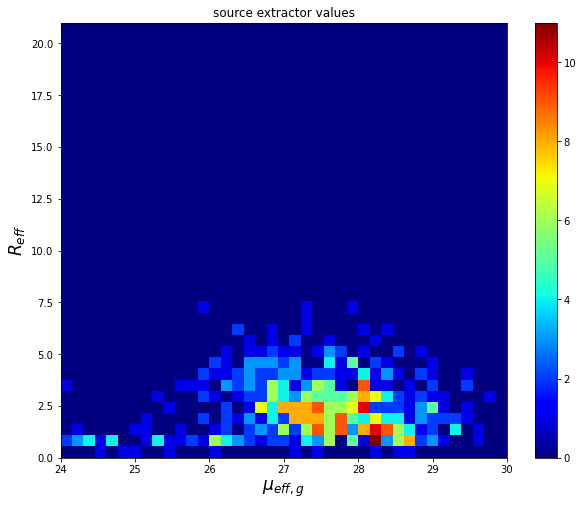

In [84]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,21,40)
bins_x = np.linspace(24,30,40)
plt.hist2d(X_mat_in[:,13],X_mat_in[:,7],bins = [bins_x,bins_y],cmap='jet')
plt.colorbar()
plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_{eff}$",fontsize='xx-large')
plt.title("source extractor values")
plt.show()

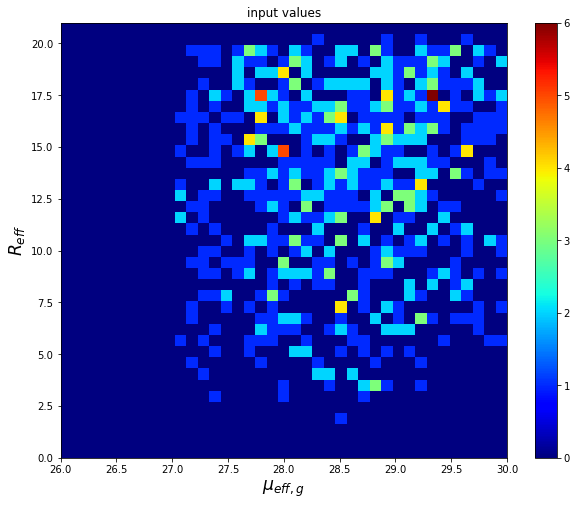

In [83]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,21,40)
bins_x = np.linspace(26,30,40)
mu = sims['MAG_G_in'] + 2.5*(np.log10(2*np.pi*(sims['REFF_in'])**2))
plt.hist2d(mu,sims['REFF_in'],bins = [bins_x,bins_y],cmap='jet')
plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_{eff}$",fontsize='xx-large')
plt.title("input values")
plt.colorbar()
plt.show()

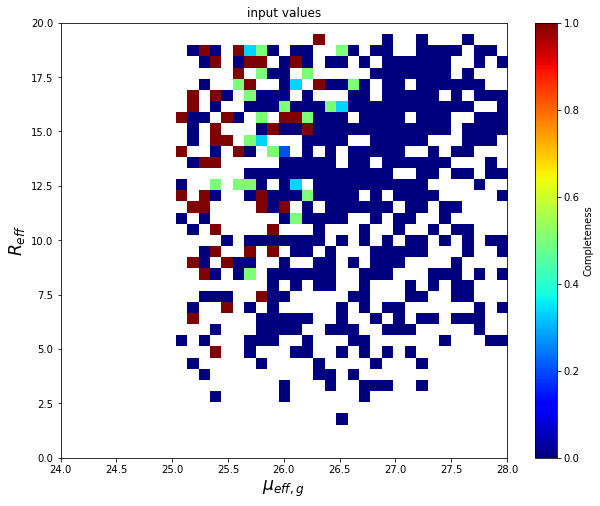

In [85]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,21,40)
bins_x = np.linspace(26,30,40)
from matplotlib import colors
mags = sims['MAG_G_in'] + 2.5*(np.log10(2*np.pi*(sims['REFF_in'])**2))
h_tot, xedge,yedge = np.histogram2d(mags,sims['REFF_in'],bins=[bins_x,bins_y])
h_pp, xedge, yedge = np.histogram2d(mags[pp_ind],sims['REFF_in'][pp_ind],bins=[bins_x,bins_y])

div = np.divide(h_pp,h_tot,where=h_tot!=0)

sel = h_tot == 0
div[sel] = np.nan

ext = [24,28,0,20]
ax = plt.imshow(np.rot90(div),cmap='jet',extent=ext,aspect='auto')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_{eff}$",fontsize='xx-large')
plt.colorbar(label='Completeness')
plt.title('input values')
plt.show()

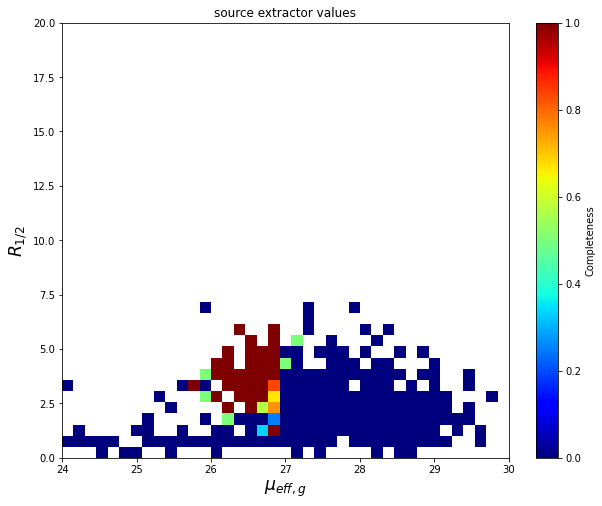

In [88]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,21,40)
bins_x = np.linspace(24,30,40)
from matplotlib import colors
mags = sims['MAG_G_in'] + 2.5*(np.log10(2*np.pi*(sims['REFF_in'])**2))
h_tot, xedge,yedge = np.histogram2d(X_mat_in[:,13],X_mat_in[:,7],bins=[bins_x,bins_y])
h_pp, xedge, yedge = np.histogram2d(X_mat_in[:,13][pp_ind],X_mat_in[:,7][pp_ind],bins=[bins_x,bins_y])

div = np.divide(h_pp,h_tot,where=h_tot!=0)

sel = h_tot == 0
div[sel] = np.nan

ext = [24,30,0,20]
ax = plt.imshow(np.rot90(div),cmap='jet',extent=ext,aspect='auto')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_{1/2}$",fontsize='xx-large')
plt.colorbar(label='Completeness')
plt.title("source extractor values")
plt.show()

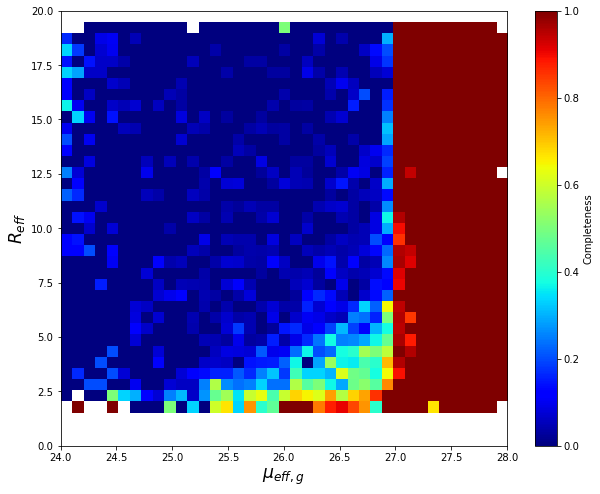

In [230]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,21,40)
bins_x = np.linspace(24,28,40)
from matplotlib import colors
mags = sims['MAG_G_in'] + 2.5*(np.log10(2*np.pi*(sims['REFF_in'])**2))
h_tot, xedge,yedge = np.histogram2d(X_mat_in[:,13],sims['REFF_in'],bins=[bins_x,bins_y])
h_pp, xedge, yedge = np.histogram2d(X_mat_in[:,13][pn_ind],sims['REFF_in'][pn_ind],bins=[bins_x,bins_y])

div = np.divide(h_pp,h_tot,where=h_tot!=0)

sel = h_tot == 0
div[sel] = np.nan

ext = [24,28,0,20]
ax = plt.imshow(np.rot90(div),cmap='jet',extent=ext,aspect='auto')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_{eff}$",fontsize='xx-large')
plt.colorbar(label='Completeness')
plt.show()

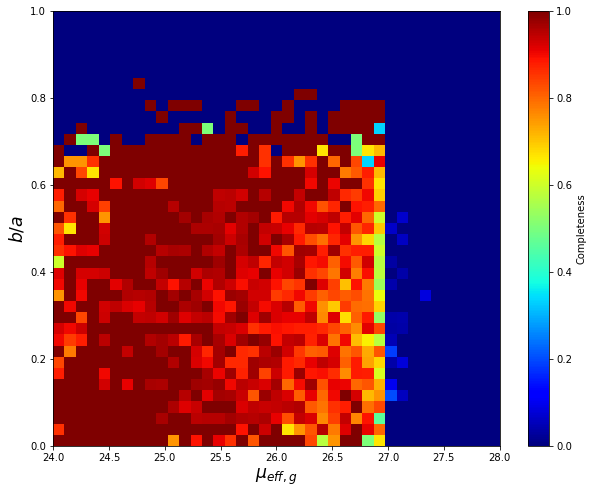

In [168]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,1,40)
bins_x = np.linspace(24,28,40)
from matplotlib import colors
h_tot, xedge,yedge = np.histogram2d(X_mat_in[:,13],X_mat_in[:,0],bins=[bins_x,bins_y])
h_pp, xedge, yedge = np.histogram2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y])

div = np.divide(h_pp,h_tot,where=h_tot!=0)

sel = h_tot != 0
ext = [24,28,0,1]
ax = plt.imshow(np.rot90(div),cmap='jet',extent=ext,aspect='auto')



plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$b/a$",fontsize='xx-large')
plt.colorbar(label='Completeness')
plt.show()

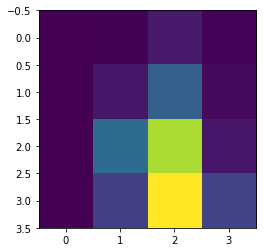

In [122]:
plt.imshow(np.rot90(h_tot))

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 2., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([23.        , 23.14285714, 23.28571429, 23.42857143, 23.57142857,
        23.71428571, 23.85714286, 24.        , 24.14285714, 24.28571429,
        24.42857143, 24.57142857, 24.71428571, 24.85714286, 25.        ,
        25.14285714, 25.28571429, 25.42857143, 25.57142857, 25.71428571,
        25.85714286, 26.        , 26.14285714, 26.28571429, 26.42857143,
        26.57142857, 26.71428571, 26.85714286, 27.        , 27.14285714,
        27.28571429, 27.42857143, 27.57142857, 27.71428571, 27.85714286,
        28.        , 28.14285714, 28.28571429, 28.42857143, 28.57142857,
        28.71428571, 28.85714286, 29.        , 29.14285714, 29.28571429,
        29.42857143, 29.57142857, 29.71428571, 29.85714286, 30.        ]),
 array([ 0.        

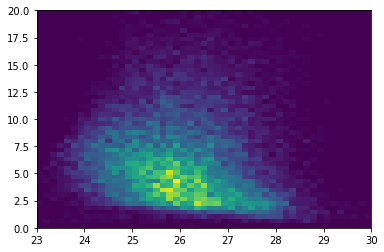

In [112]:
plt.hist2d(X_mat_in[:,13],X_mat_in[:,7],bins = [bins_x,bins_y])

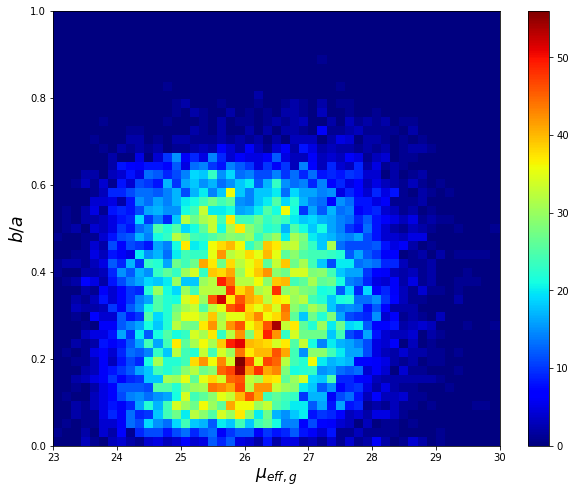

In [127]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,1)
bins_x = np.linspace(23,30)
h_tot, xedge,yedge,image = plt.hist2d(X_mat_in[:,13],X_mat_in[:,0],bins=[bins_x,bins_y],cmap='jet')
#h_pp, xedge, yedge,image = plt.hist2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y],cmap='jet')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$b/a$",fontsize='xx-large')
plt.colorbar()
plt.show()

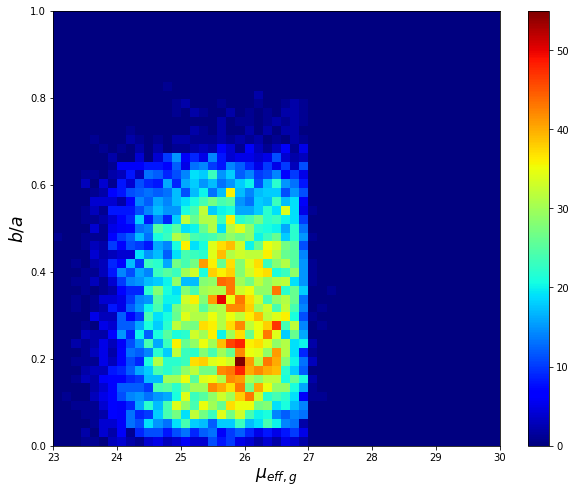

In [128]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,1)
bins_x = np.linspace(23,30)
#h_tot, xedge,yedge,image = plt.hist2d(X_mat_in[:,13],X_mat_in[:,0],bins=[bins_x,bins_y],cmap='jet')
h_pp, xedge, yedge,image = plt.hist2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y],cmap='jet')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$b/a$",fontsize='xx-large')
plt.colorbar()
plt.show()

In [82]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,1)
bins_x = np.linspace(23,30)
h_tot, xedge,yedge,image = plt.hist2d(X_mat_in[:,13],X_mat_in[:,0],bins=[bins_x,bins_y])
h_pp, xedge, yedge,image = plt.hist2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y],cmap='jet')

extent = [-50, +50, 0, 10]
comp = np.divide(h_pp,h_tot,where=h_tot!=0)
im = plt.imshow(comp,aspect='auto',extent=extent,cmap='jet')

plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$a/b$",fontsize='xx-large')
plt.colorbar()
plt.show()

array([0.07421264, 0.275508  , 0.62751865, ..., 0.34658049, 0.62670988,
       0.35095216])

In [73]:
comp

array([[4.65570395e-310, 4.65570398e-310, 4.65570395e-310, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 9.49396545e-320]])

In [ ]:
np.shape()

In [68]:
for i in range(np.shape(h_tot)[0]):
    

/tmp/ipykernel_2683388/1954464738.py:1: RuntimeWarning: invalid value encountered in true_divide
  h_pp/h_tot


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  0., nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan,  0., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  0., ..., nan, nan, nan]])

In [60]:
h_tot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [171]:
old_sims = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/training_ext/X_feat_sim.npy")

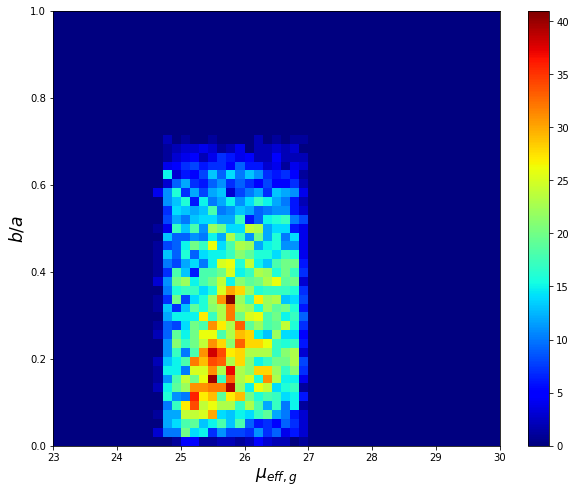

In [172]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,1)
bins_x = np.linspace(23,30)
h_tot, xedge,yedge,image = plt.hist2d(old_sims[:,13],old_sims[:,0],bins=[bins_x,bins_y],cmap='jet')
#h_pp, xedge, yedge,image = plt.hist2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y],cmap='jet')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$b/a$",fontsize='xx-large')
plt.colorbar()
plt.show()

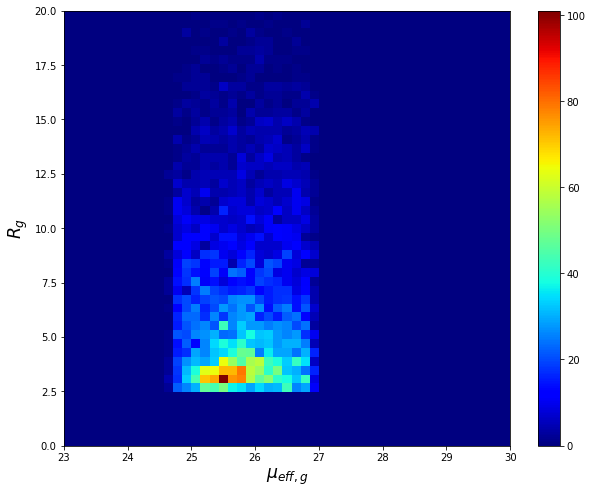

In [175]:
_ = plt.figure(facecolor='white',figsize=(10,8))
bins_y = np.linspace(0,20)
bins_x = np.linspace(23,30)
h_tot, xedge,yedge,image = plt.hist2d(old_sims[:,13],old_sims[:,7],bins=[bins_x,bins_y],cmap='jet')
#h_pp, xedge, yedge,image = plt.hist2d(X_mat_in[:,13][pp_ind],X_mat_in[:,0][pp_ind],bins=[bins_x,bins_y],cmap='jet')


plt.xlabel("$\mu_{eff,g}$",fontsize='xx-large')
plt.ylabel("$R_g$",fontsize='xx-large')
plt.colorbar()
plt.show()

In [234]:
coadd_ind = np.load("/data/des81.a/data/kherron/LSBG/Y6_FINAL/v3/y6_lsbg_FINAL.npy")

In [ ]:
y6_gold = 